In [1]:
import nibabel as nib
import numpy as np
import scipy.stats
from matplotlib import pyplot as plt
import nilearn.image
import sklearn.decomposition
from sklearn.linear_model import Ridge
#from fMRI_Regions import atlas
from fMRI_Regions import atlas_masker
import sklearn.metrics as sm
from sampler1 import Sampler
from settings import settings
from scipy import signal
import scipy
import time
import mne
import glob
sampler = Sampler('/Users/ilamiheev/Desktop/data/')
from scipy import signal
masker, labels = atlas_masker('sub')
path_new_set='/Users/ilamiheev/Downloads/coredf.set'
path_new='/Users/ilamiheev/Downloads/corrr.edf'
eeg = mne.io.read_raw_edf('/Users/ilamiheev/Downloads/eeg_fmri_data/eeg_off/eeg_off_1.edf',exclude=['EOG', 'ECG','CW1', 'CW2','CW3','CW4','CW5','CW6','Status'])
#eeg = mne.io.read_raw_edf(path_new,exclude=['EOG', 'ECG','CW1', 'CW2','CW3','CW4','CW5','CW6','Status'])
data = eeg.get_data()
channels=eeg.ch_names
eeg1=data
f, t, ft = signal.stft(eeg1[:,0:2000],fs=1000, nperseg=400)
ix_chs = f[2:19] 
num_frames = 140
num_train_frames = 95
num_test_frames = 20
nmse_scores_off=[]
pearson_scores_off=[]
r2_scores_off=[]
#sampler_eeg=
Coefs=[]
index_dif=[]
eeg_set_off_paths=glob.glob("/Users/ilamiheev/Downloads/eeg_fmri_data/eeg_set_off/*.set")
eeg_edf_off_paths=glob.glob("/Users/ilamiheev/Downloads/eeg_fmri_data/eeg_off/*.edf")
fmri_off_paths=glob.glob("/Users/ilamiheev/Downloads/eeg_fmri_data/fmri_off/*.nii")
forw_delay=0
patient_list=[1,2,3,4]
#find min number of volumes in all dataset and use it as end in interp1d
#plot the components of channels on topomap sculp
        #sto=patient_list[tau]
bb=mne.io.read_raw_eeglab('/Users/ilamiheev/Downloads/eeg_fmri_data/eeg_set_off/eeg_set_1.set')
#bb=mne.io.read_raw_eeglab(path_new_set)
k=mne.events_from_annotations(bb)
eeg_path='/Users/ilamiheev/Downloads/eeg_fmri_data/eeg_off/eeg_off_1.edf'
#eeg_path=path_new
fmri_path='/Users/ilamiheev/Downloads/eeg_fmri_data/fmri_off/fmri_off_1.nii'
#fmri_path='/Users/ilamiheev/Downloads/eeg_fmri_data/CWL_Data/mri/epi_normalized/rwatrio1_eoec_in-scan_hpump-on.nii'
#another function for finding delay.
jj=k[1]['mri']
a,b=np.where(k[0]==jj)
delay=k[0][a[0],0]
fmri_end=k[0][a[-1],0]
print(delay)
print(fmri_end)
delayf=settings.frame_creation_time * 5 + delay
train_start = delayf
train_end = settings.frame_creation_time * (num_train_frames)+delay
test_start = settings.frame_creation_time * (num_frames - num_test_frames)+ delay
test_end = settings.frame_creation_time * (num_frames)+ delay
current_patient = 35
random_state = 42
x_train, y_train, x_fl_train = sampler.create_one_man_dataset(patient=current_patient, start_time=train_start,
                                                          end_time=train_end, delay=delay,fmri_end=fmri_end,eeg_path=eeg_path,fmri_path=fmri_path, forw_delay=forw_delay)
x_test, y_test, x_fl_test =  sampler.create_one_man_dataset(patient=current_patient, start_time=test_start,
                                                       end_time=test_end, delay=delay, fmri_end=fmri_end,eeg_path=eeg_path,fmri_path=fmri_path, forw_delay=forw_delay)
alphas = np.logspace(-3, 3, 7)
scores= np.zeros(((len(labels)-1),np.shape(x_test)[1]))
scoresr2 = np.zeros(((len(labels)-1),np.shape(x_test)[1]))
scoresmse1 = np.zeros(((len(labels)-1),np.shape(x_test)[1],len(alphas)))  
scoresr21 = np.zeros(((len(labels)-1),np.shape(x_test)[1],len(alphas))) 
mm=[]
bbb=[]
x_train=x_train*1e+4
x_test=x_test*1e+4
#change to nested cross validation
#x_train1, x_val1, y_train1, y_val1 = sklearn.model_selection.train_test_split(x_train,y_train, train_size=0.8,test_size=0.2)
x_train1=x_train[0:1500,...]
x_val1=x_train[1600:2000,...]
y_train1=y_train[0:1500,...]
y_val1=y_train[1600:2000,...]
#y_val=
best_alpha=[]
for zone in range(len(labels)-1):
    for a in range((np.shape(x_test)[1])): 
        for ii, alpha in enumerate(alphas): 
            ridgereg = Ridge(alpha, normalize=False,fit_intercept=True)
            ridgereg.fit(x_train1[:,a,:,:].reshape(np.shape(x_train1)[0],-1), y_train1[:,zone]) 
            predicted_y_test = ridgereg.predict(x_val1[:,a,:,:].reshape(np.shape(x_val1)[0],-1))
            scoresmse1[zone,a,ii] = sklearn.metrics.mean_squared_error(y_val1[:, zone], predicted_y_test)  
            scoresr21[zone,a,ii] = sklearn.metrics.r2_score(y_val1[:, zone], predicted_y_test)
            mm.append(ridgereg)
mmm=np.array(mm)
#mmm=mmm.reshape(scoresmse.shape)
coefs=[]
scores_max1=[]
scores_max2=[]
scores_max3=[]
R=[]
best_param=[]
for zone in range(len(labels)-1):
    ind = np.unravel_index((np.argmax((scoresr21[zone,...]))), scoresr21[zone,...].shape)
    best_param.append(ind)
#scores_max=np.array(scores_max)      

/Users/ilamiheev/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


Extracting EDF parameters from /Users/ilamiheev/Downloads/eeg_fmri_data/eeg_off/eeg_off_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


<ipython-input-1-593ce0b87815>:47: RuntimeWarning: The following EEG sensors did not have a position specified in the selected montage: ['EOG', 'ECG', 'CW1', 'CW2', 'CW3', 'CW4', 'CW5', 'CW6']. Their position has been left untouched.
  bb=mne.io.read_raw_eeglab('/Users/ilamiheev/Downloads/eeg_fmri_data/eeg_set_off/eeg_set_1.set')
<ipython-input-1-593ce0b87815>:47: RuntimeWarning: Data will be preloaded. preload=False or a string preload is not supported when the data is stored in the .set file
  bb=mne.io.read_raw_eeglab('/Users/ilamiheev/Downloads/eeg_fmri_data/eeg_set_off/eeg_set_1.set')


Used Annotations descriptions: ['boundary', '[]', 'R', 'Sync On', 'mri', 'S201', 'beo', 'S  1', 'eeo', 'fl', 'S241', 'S  5', 'R255', 'R254', 'S221', 'bec', 'eec']
23322
300223
Extracting EDF parameters from /Users/ilamiheev/Downloads/eeg_fmri_data/eeg_off/eeg_off_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up band-pass filter from 5 - 60 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 15.0 Hz
Filter length of 1651 samples (1.651 sec) selected


<ipython-input-1-593ce0b87815>:47: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  bb=mne.io.read_raw_eeglab('/Users/ilamiheev/Downloads/eeg_fmri_data/eeg_set_off/eeg_set_1.set')
/Users/ilamiheev/.local/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


Extracting EDF parameters from /Users/ilamiheev/Downloads/eeg_fmri_data/eeg_off/eeg_off_1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Setting up band-pass filter from 5 - 60 Hz
l_trans_bandwidth chosen to be 2.0 Hz
h_trans_bandwidth chosen to be 15.0 Hz
Filter length of 1651 samples (1.651 sec) selected


/Users/ilamiheev/.local/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:232: DeprecationWarning: The 'cachedir' attribute has been deprecated in version 0.12 and will be removed in version 0.14.
Use os.path.join(memory.location, 'joblib') attribute instead.
  if (memory.cachedir is None and memory_level is not None


In [ ]:
scoresr21[10,best_param[10][0],best_param[10][1]]

NameError: name 'lkl' is not defined

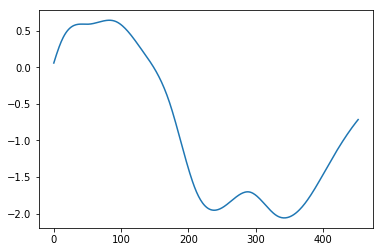

In [4]:
def norm(data):
    return (data)/(max(data)-min(data))
for i in range(len(labels)-1):
    #lkl=bbb[i]
    plt.plot(y_test[:,i])
    plt.plot(lkl)
    plt.legend(('Ground truth','Prediction'),
    loc='upper right')
    plt.title(labels[i+1])
    plt.show()

In [ ]:
x_train2, x_val2, y_train2, y_val2 = sklearn.model_selection.train_test_split(x_test, y_test, train_size=0.8,test_size=0.2)

In [2]:
R=[]
best_param=[]
for zone in range(len(labels)-1):
    ind = np.unravel_index((np.argmin((scoresmse1[zone,...]))), scoresmse1[zone,...].shape)
    best_param.append(ind)

In [ ]:
best_param

In [ ]:
coefs=[]
scores_max1=[]
scores_max2=[]
scores_max3=[]
best_channel=[]
best_alpha=[]
for zone in range(len(labels)-1):
    ind = np.unravel_index((np.argmin((scoresmse[zone,...]))), scoresr2[zone,...].shape)
    coefs.append(mmm[zone].coef_)
    best_channel.append(ind)
#scores_max=np.array(scores_max)      

In [ ]:
tt=[]
for zone in range(len(labels)-1):
    j=(scoresmse1[zone,...]).min()
    tt.append(j)

In [ ]:
scoresmse1[2][8][0]

In [ ]:
print(np.shape(y_test[:,0]))

In [ ]:
type((y_test[:,0]))

In [3]:
from sklearn.linear_model import Ridge
scores= np.zeros((len(labels)-1))
scoresr2 = np.zeros((len(labels)-1))
scoresmse = np.zeros((len(labels)-1))
mm=[]
bbb=[]
coefs=[]
for zone in range(len(labels)-1):  
    ridgereg = Ridge(alpha=alphas[best_param[zone][1]], normalize=False, fit_intercept=True)
    a=best_param[zone][0]
    ridgereg.fit(x_train[:,a,:,:].reshape(np.shape(x_train)[0],-1), y_train[:,zone]) 
    #predicted_y_test=[]
    #for nn in range(np.shape(x_test)[0]):
        #predicted_y_test.append(np.dot(Final,x_test[nn,a,...].reshape(-1,1)))
    #predicted_y_test=np.array(predicted_y_test).reshape(-1)
    predicted_y_test = ridgereg.predict(x_test[:,a,:,:].reshape(np.shape(x_test)[0],-1))
    scores[zone] = scipy.stats.pearsonr(y_test[:, zone], predicted_y_test)[0]
    scoresr2[zone] = sklearn.metrics.r2_score(y_test[:, zone], predicted_y_test)
    scoresmse[zone] = sklearn.metrics.mean_squared_error(y_test[:, zone], predicted_y_test)       
    mm.append(ridgereg)
    bbb.append(predicted_y_test)
mmm1=np.array(mm)
bbb1=np.array(bbb)
scores_max1=[]
scores_max2=[]
scores_max3=[]
for zone in range(len(labels)-1):
    scores_max1.append(scores[zone])
    scores_max2.append(scoresmse[zone])
    scores_max3.append(scoresr2[zone])
#coefs=np.array(coefs)
nmse_scores_off.append(scores_max2)
pearson_scores_off.append(scores_max1)
r2_scores_off.append(scores_max3)
#scores_max=np.array(scores_max)    

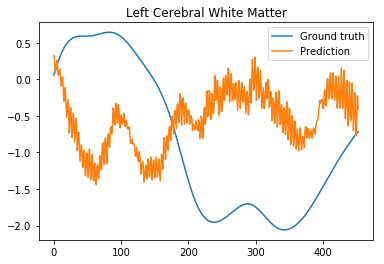

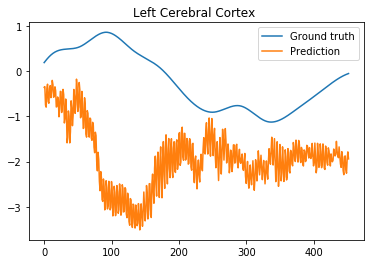

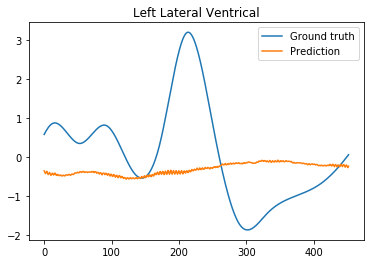

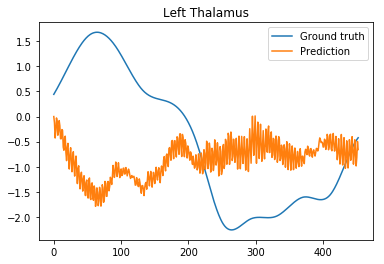

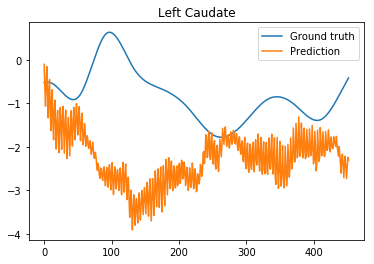

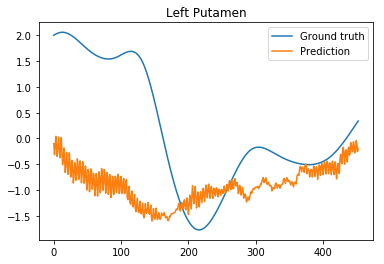

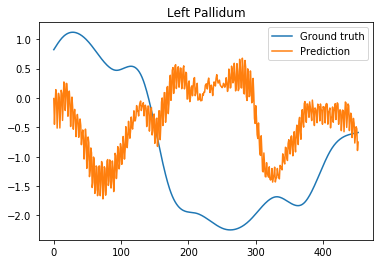

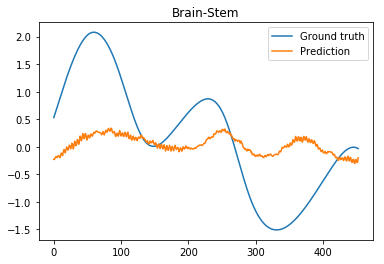

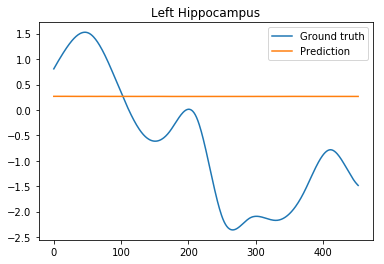

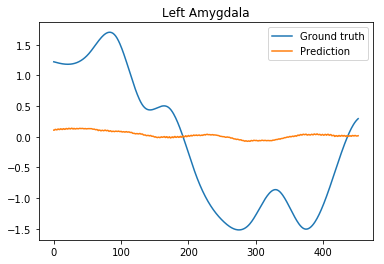

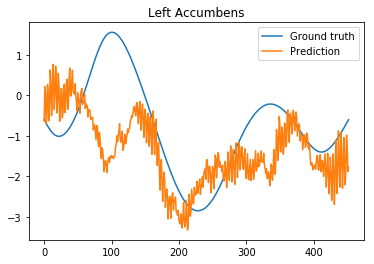

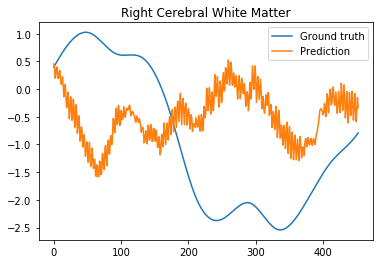

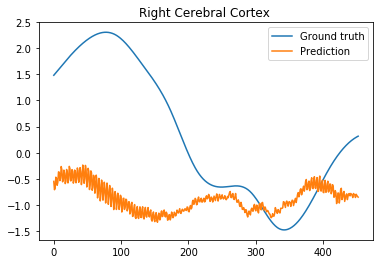

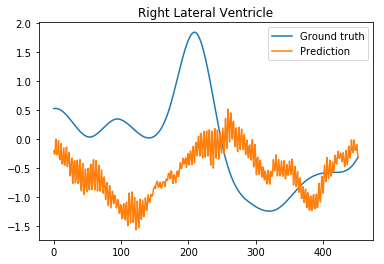

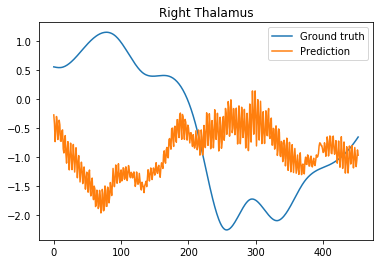

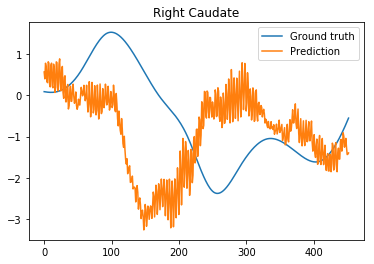

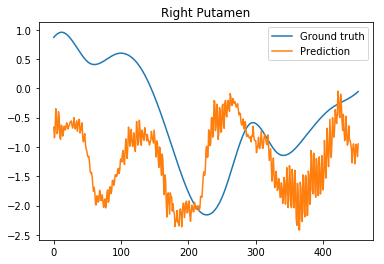

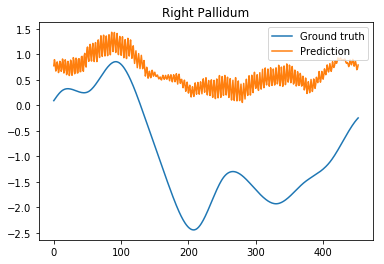

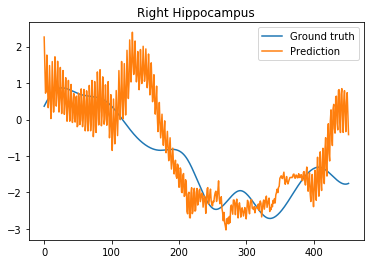

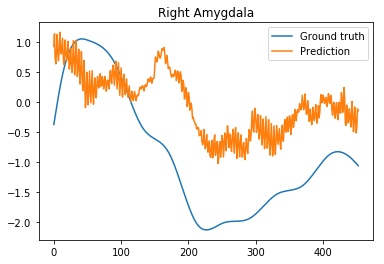

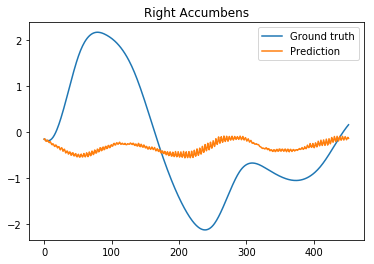

In [5]:
def norm(data):
    return (data)/(max(data)-min(data))
for i in range(len(labels)-1):
   # lkl=bbb[i,index_dif[0][i][0],index_dif[0][i][1]]
    plt.plot((y_test[:,i]))
    plt.plot((bbb[i]))
    plt.legend(('Ground truth','Prediction'),
    loc='upper right')
    plt.title(labels[i+1])
    plt.show()

In [ ]:
best_params

In [ ]:
scoresmse

In [ ]:
scores_max3

In [ ]:
best_param

In [ ]:
ridgereg1

In [ ]:
scores_max3

In [ ]:
mmm[0][1].alpha_

In [ ]:
np.shape(x_train)

In [ ]:
pearson_scores_off

In [ ]:
labels

<Montage | standard_1020 - 97 channels: LPA, RPA, Nz ...>


NameError: name 'best_p' is not defined

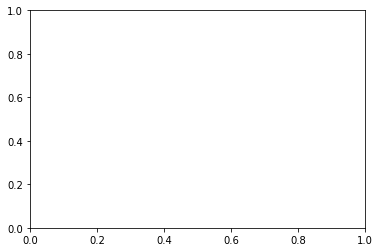

In [6]:
montage = mne.channels.read_montage('standard_1020')
print(montage)
eeg.set_montage(montage, set_dig=True)
for i in range(len(labels)-1):
    fig, ax1 = plt.subplots()
    nn,_=mne.viz.plot_topomap(scoresmse1[i,:,best_p[i][1]],vmin=min(scoresmse1[i,:,R[i][1]]),vmax=max(scoresmse1[i,:,R[i][1]]),cmap='RdBu_r', pos=eeg.info,axes=ax1,show=False, names=channels, show_names=True)
    ax1.set(title=labels[i+1])
    fig.colorbar(nn)
    mne.viz.tight_layout()
    plt.show()

In [8]:
real_coefs=[]
coefs=[]
for s in range(len(labels)-1):
    coefs=mmm1[s].coef_
    coefs=np.array(coefs)
    mean_coefs=coefs
    mean_coefs=mean_coefs.reshape(np.shape(x_test)[2],np.shape(x_test)[3])
    #mean_coefs=prepro.normalize(mean_coefs)
    #max_coef = mean_coefs.max()
    vect=[]
    for i in range(np.shape(x_train)[0]):
        S1=x_train[i,best_param[s][0],...].reshape(-1)
        vect.append(S1)
    vect=(np.array(vect)).T
    vect2=[]
    for tao in range(np.shape(x_train)[0]):
        S2=np.dot(mean_coefs.reshape(-1,1).T,vect[:,tao])
        vect2.append(S2)
    vect2=(np.array(vect2)).T
    #Fin=np.cov(vect,vect2)
    Final=[]
    for tim in range(np.shape(vect)[0]):
        Final.append(np.cov(vect[tim,:],vect2)[0,1])
    Final=np.array(Final)
    Final=Final.reshape(np.shape(x_test)[2],np.shape(x_test)[3])
    real_coefs.append(Final)

In [ ]:
for j in range(len(labels)-1):
    y_predict_fin=x_test*

In [ ]:
import sklearn.preprocessing as prepro

In [ ]:
for s in range(len(labels)-1):
    coefs=np.array(coefs)
    mean_coefs=coefs[s,:]
    ix_chs = f[2:19] 
    mean_coefs=mean_coefs.reshape(np.shape(x_test)[2],np.shape(x_test)[3])
    #mean_coefs=prepro.normalize(mean_coefs)
    #max_coef = mean_coefs.max()
    vect=[]
    for i in range(np.shape(x_train)[0]):
        S1=x_train[i,R[s][0],...].reshape(-1)
        vect.append(S1)
    vect=(np.array(vect)).T
    vect2=[]
    for tao in range(np.shape(x_train)[0]):
        S2=np.dot(mean_coefs.reshape(-1,1).T,vect[:,tao])
        vect2.append(S2)
    vect2=(np.array(vect2)).T
    #Fin=np.cov(vect,vect2)
    Final=[]
    for tim in range(np.shape(vect)[0]):
        Final.append(np.cov(vect[tim,:],vect2)[0,1])
    Final=np.array(Final)
    Final=Final.reshape(np.shape(x_test)[2],np.shape(x_test)[3])
    #Fin=Fin.reshape(np.shape(x_test)[2],np.shape(x_test)[3])
    #Sn=np.cov(vect)
    #Sm=np.cov(vect2)
    #S=np.cov(np.dot(x_train[],x_train[].T)
    #Fin1=np.dot(Sn,mean_coefs.reshape(-1))
    #Fin2=np.dot(Fin1,np.linalg.inv(Sm))
    #Fin2=Fin2.reshape(np.shape(x_test)[2],np.shape(x_test)[3])
    #np.cov(np.dot)
    #re=np.dot(mean_coefs.T, x_train[1,2,...])
    fig, ax = plt.subplots(figsize=(10, 8))
    pll=ax.pcolormesh(np.linspace(-16.384,0,60),  ix_chs, Final, cmap='RdBu_r', shading='gouraud')
    #ax.axvline(time_plot, ls='--', color='k', lw=2)
    ax.set(xlabel='Delay (s)', ylabel='Freq_bands', title=labels[s+1])
    fig.colorbar(pll)
    #plt.setp(ax.get_xticklabels(), rotation=45)
    mne.viz.tight_layout()

/Users/ilamiheev/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


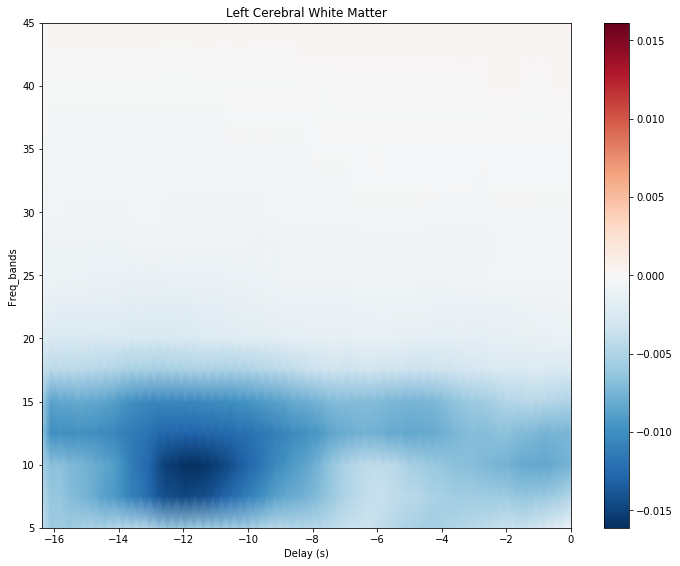

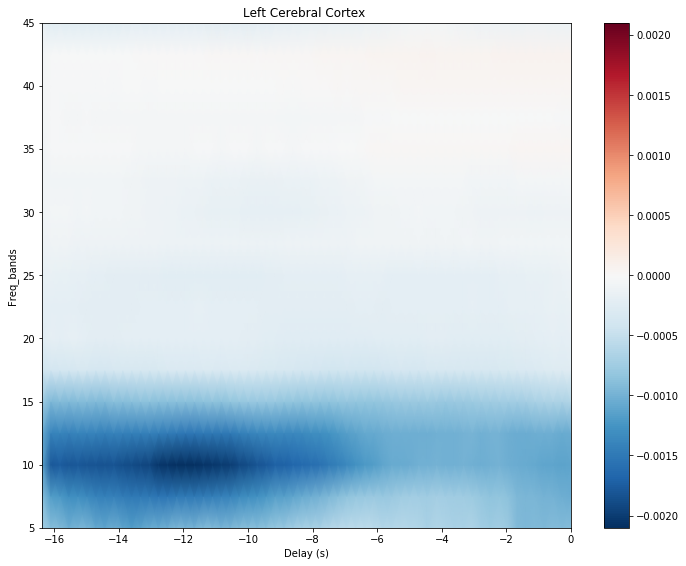

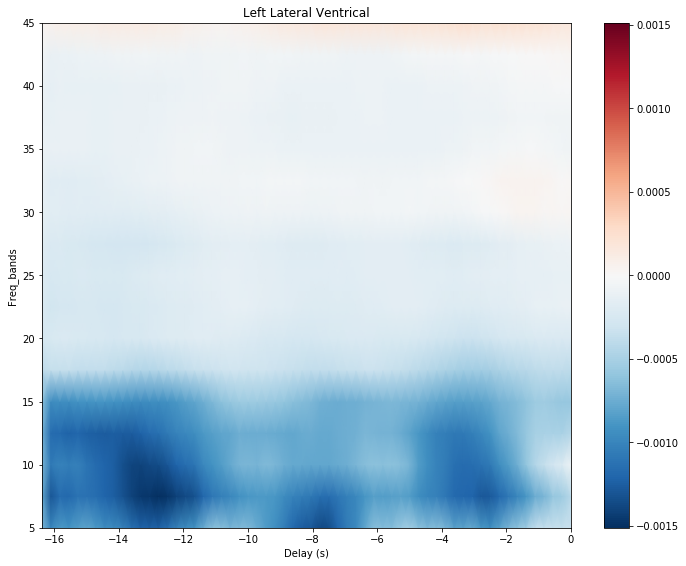

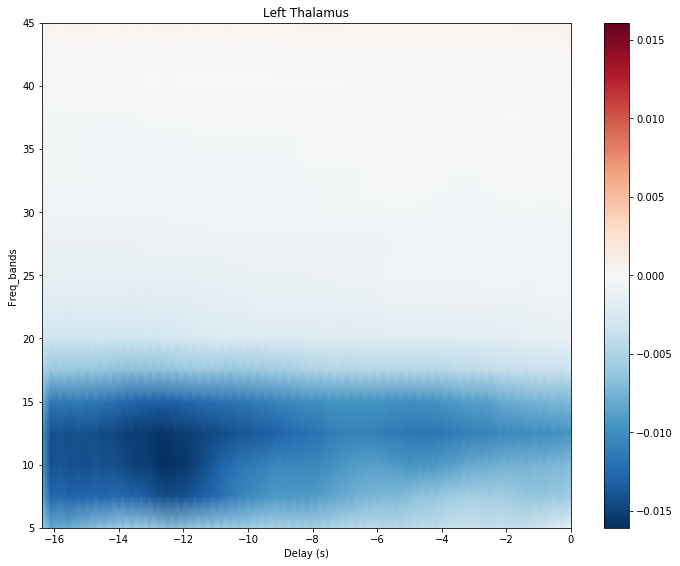

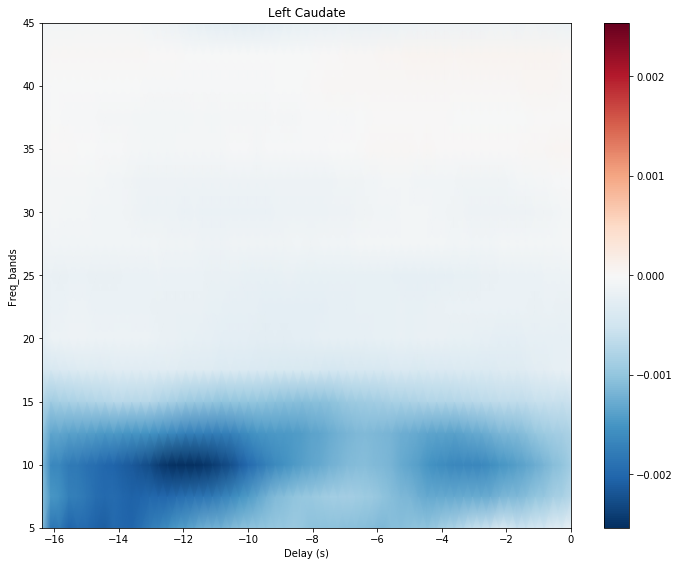

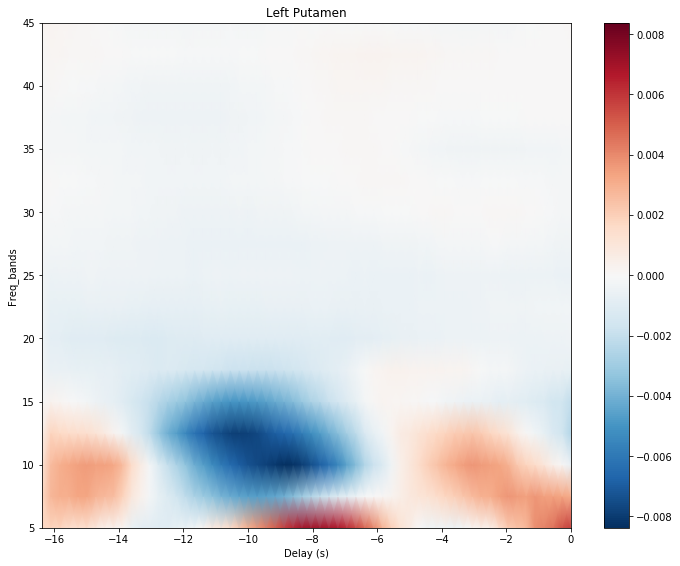

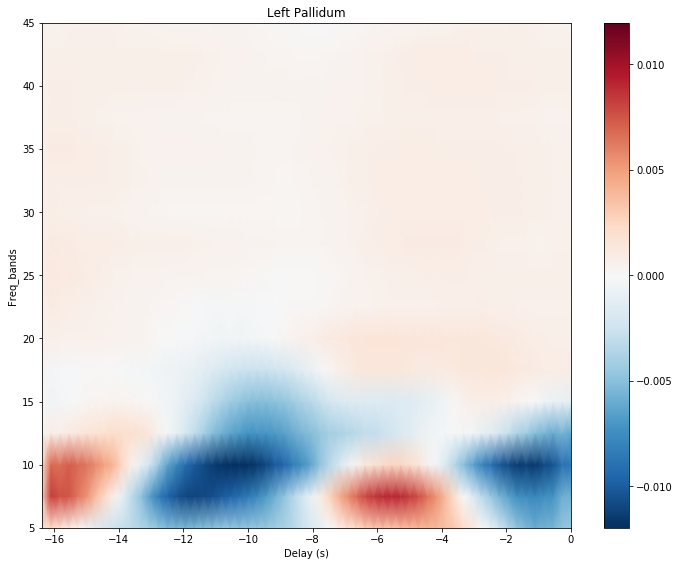

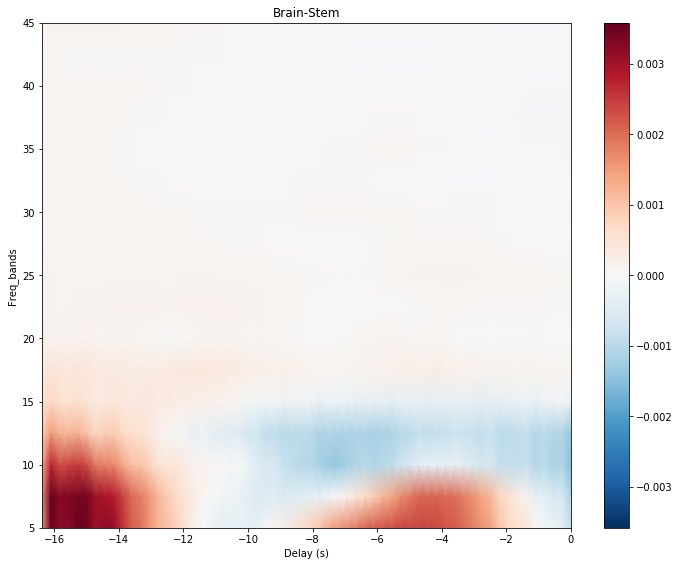

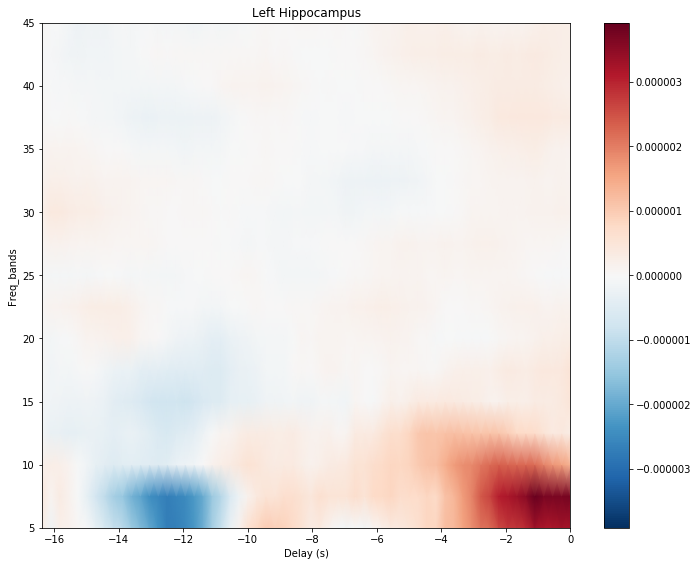

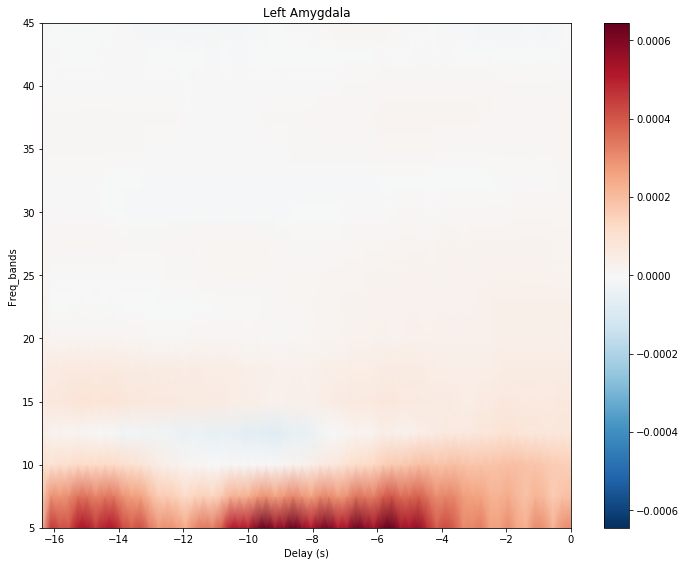

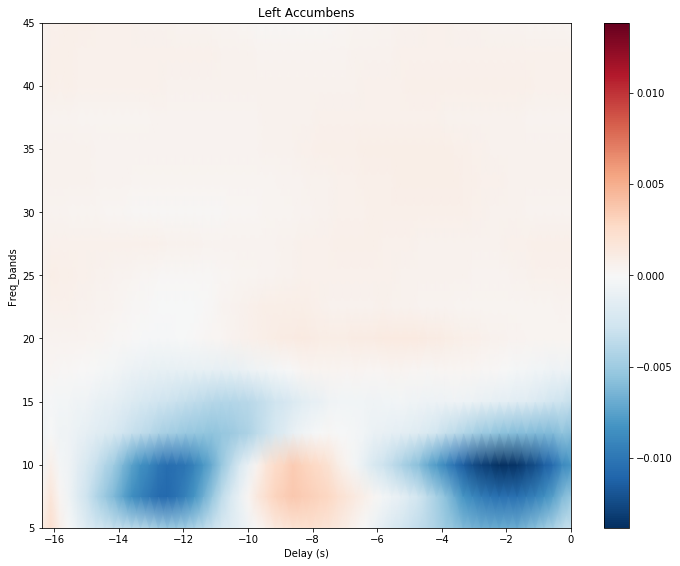

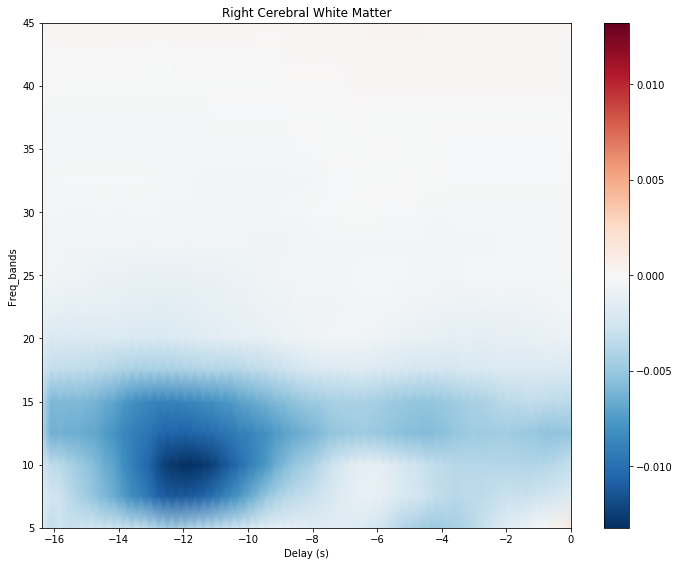

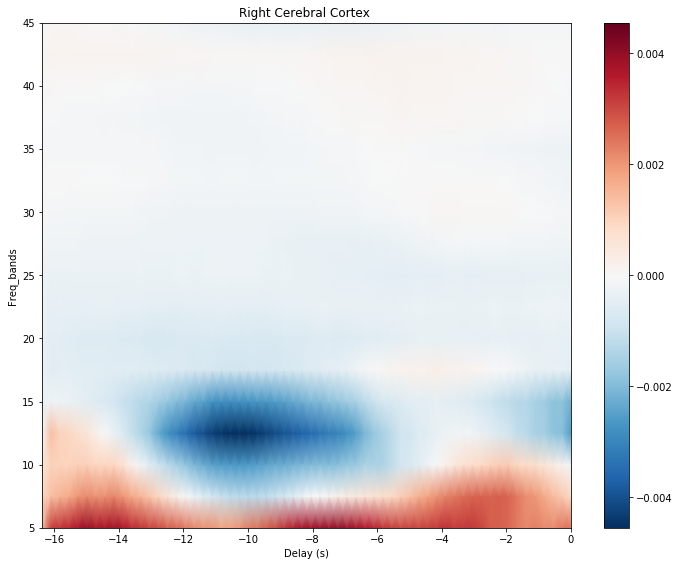

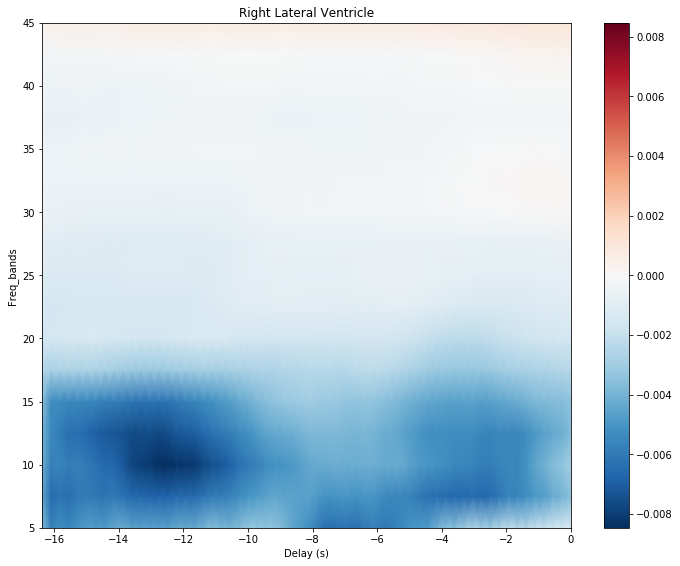

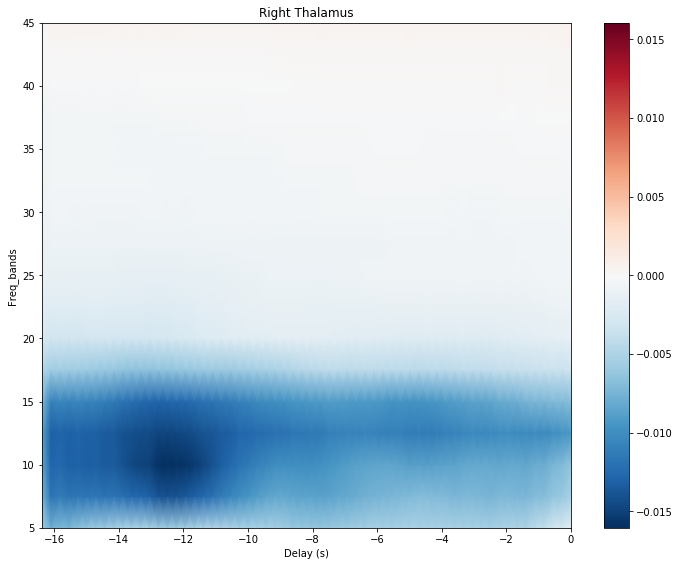

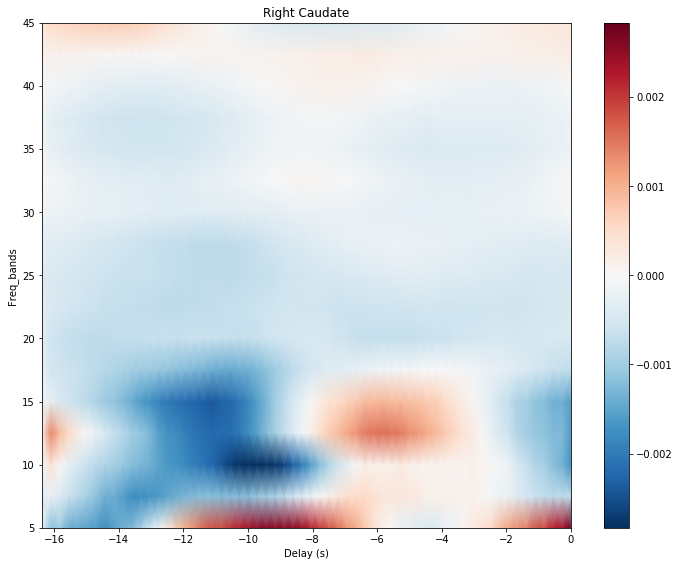

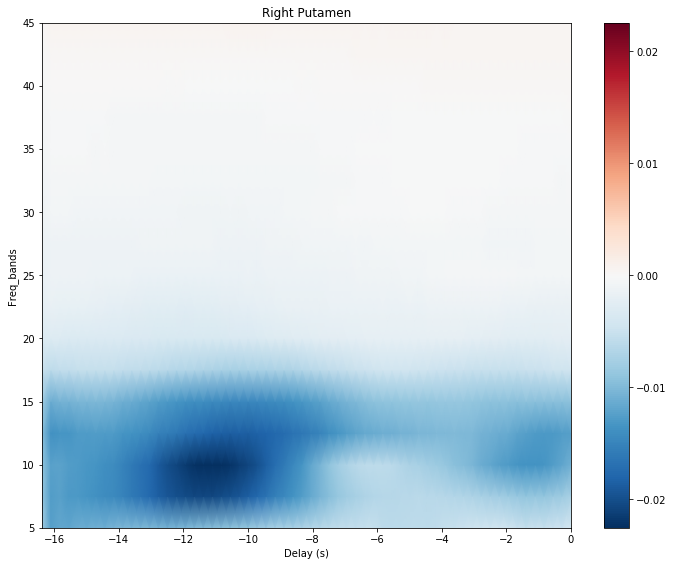

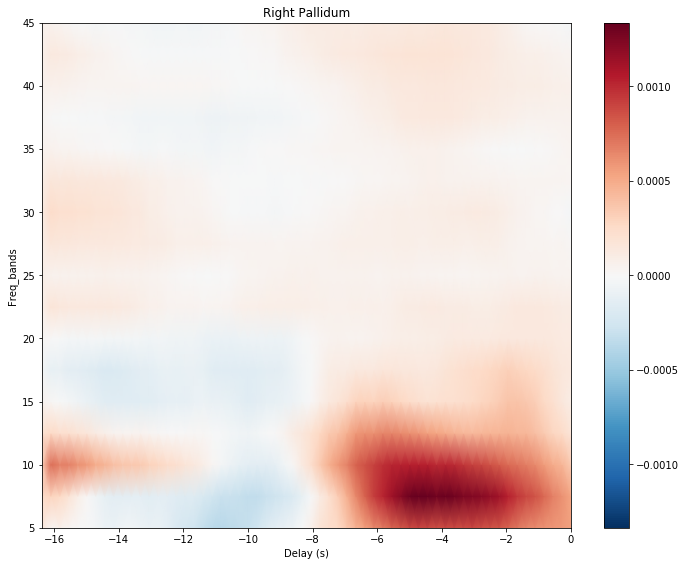

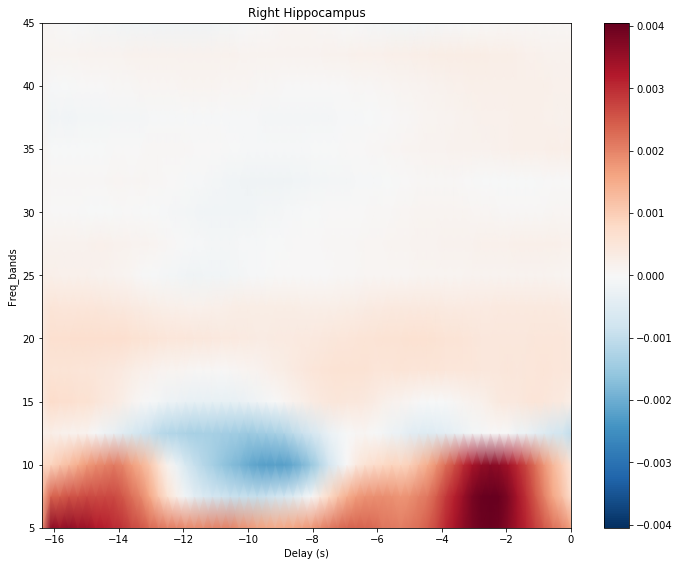

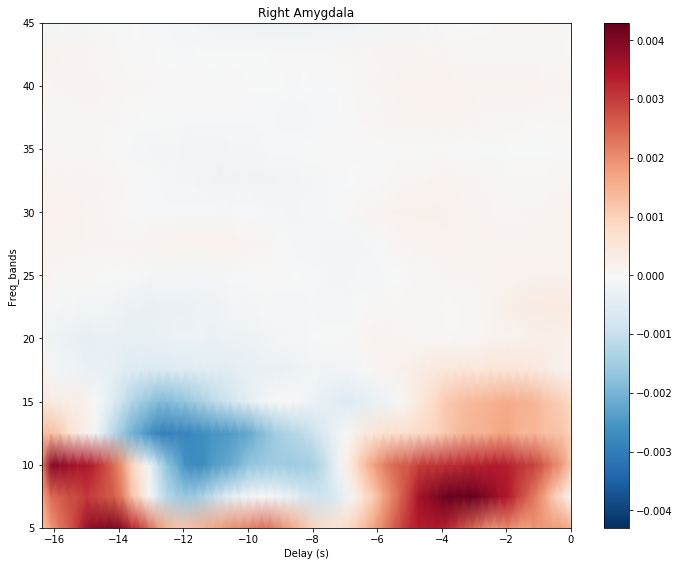

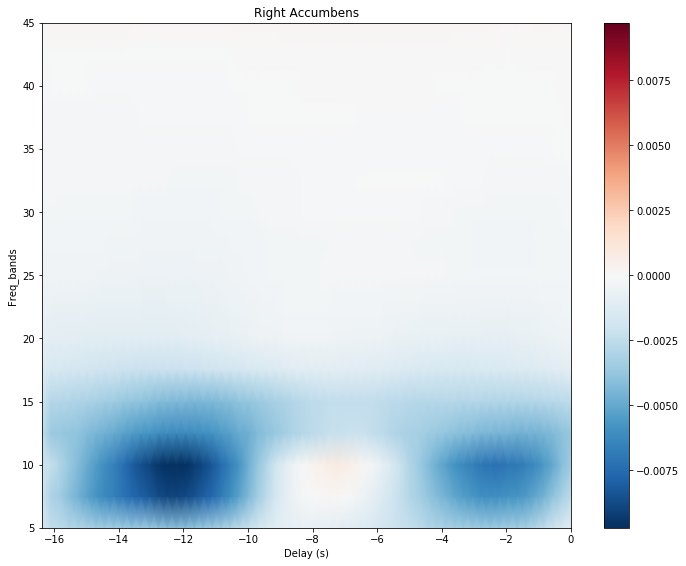

In [9]:
def norm(data):
    return (data)/(np.amax(data)-np.amin(data))
masker, labels = atlas_masker('sub')
for s in range(len(labels)-1):
    #coefs=np.shape(coefs)
    #mean_coefs=coefs[s,:]
    ix_chs = f[2:19] 
    #mean_coefs=mean_coefs.reshape(np.shape(x_test)[2],np.shape(x_test)[3])
    real_coefs=np.array(real_coefs)
    fig, ax = plt.subplots(figsize=(10, 8))
    pll=ax.pcolormesh(np.linspace(-16.384,0,60),  ix_chs, (real_coefs[s]),vmin=-abs(np.amax(abs(real_coefs[s]))),vmax=abs(np.amax(abs(real_coefs[s]))), cmap='RdBu_r', shading='gouraud')
    #ax.axvline(time_plot, ls='--', color='k', lw=2)
    ax.set(xlabel='Delay (s)', ylabel='Freq_bands', title=labels[s+1])
    fig.colorbar(pll)
    #plt.setp(ax.get_xticklabels(), rotation=45)
    mne.viz.tight_layout()

In [ ]:
np.shape(coefs)

In [ ]:
 Sn=np.cov(vect)

In [ ]:
np.shape(vect)

In [ ]:
S1

In [ ]:
np.shape(x_train)

In [ ]:
JJ=[]
for nn in range(len(labels)-1):
    S=[]
    for c in range(np.shape(x_test)[0]):
        k=np.dot(x_test[c,R[nn][0],...],x_test[c,R[nn][0],...].transpose())
        S.append(k)
    dd=sum(S)
    JJ.append(dd)
        
    

In [ ]:
np.shape(x_test[c,R[nn][0],...])


In [ ]:
for i in range(len(labels)-1):
    coefs=np.array(coefs)
    #mean_coefs=coefs[i,:]
    H=np.dot(coefs,JJ[i])


In [ ]:
np.shape(x_test)

In [ ]:
A=coeffs[1]

In [ ]:
for i in range(len(labels)-1):
    coefs=np.array(coefs)
    mean_coefs=coefs[i,:]
    max_coef = mean_coefs.max()
    mean_coefs=max_coef
    #mean_coefs=mean_coefs.reshape(60,18)
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.pcolormesh(np.linspace(-15,0,60),  ix_chs, mean_coefs, cmap='RdBu_r')             
    #vmin=-max_coef, vmax=max_coef, shading='gouraud')
    ax.set(xlabel='Delay (s)', ylabel='Freq_bands', title=labels[i+1])
    mne.viz.tight_layout()

In [ ]:
scoresmse[0,:,R[i][1]]

In [ ]:
for zone in range(len(labels)-1):
    #sigm=[]
    #kkk=[]
    #for i in range(len(channels)):
    ind2 = np.unravel_index((np.argmin((scoresmse[zone,...]))), scoresr2[zone,...].shape)
    #ind=np.argmax(np.abs(scores[zone,i,...]))
    #kkk.append(mmm[zone,i,ind].coef_)
    coefs.append(mmm[zone,ind[0],R[i][2].coef_)
    #sigm.append(scores[zone,i,ind])
    scores_max1.append(scores[zone,ind[0],ind[1]])
    scores_max2.append(scoresmse[zone,ind[0],ind[1]])
    scores_max3.append(scoresr2[zone,ind[0],ind[1]])
    R.append(ind)
    #scores_max.append(sigm)
    #coefs.append(kkk)
coefs=np.array(coefs)

In [ ]:
montage = mne.channels.read_montage('standard_1020')
print(montage)
eeg.set_montage(montage, set_dig=True)

In [ ]:
np.shape(x_train)

In [ ]:
np.shape(x_test)

In [ ]:
vectors1=[]
for j in range(len(pearson_scores_off[0])):
    vectors=[]
    for i in range(len(pearson_scores_off)):
        vectors.append(pearson_scores_off[i][j])
    vectors1.append(vectors)
for h in range(len(vectors1)):
    plt.plot([0,1,4,5,7,9,10,11,12,13,14,14.5],vectors1[h])
    plt.title(labels[h+1])
    plt.show()

In [ ]:
MM=[0.456,0.434,0.438,0.420,0.428,0.224,0.218,0.220,0.222,0.195,0.200,0.201,0.207,0.203,0.206]
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(np.linspace(-15, 0, num=15),MM,'ro')
plt.text(-13.5, 0.4, 'p-value<0.05',fontdict=font)
plt.text(-5, 0.25, 'p-value>0.05',fontdict=font)
plt.title(labels[20], fontdict=font)
plt.xlabel(xlabel = 'Delay of forward signal (s)',fontdict=font)
plt.ylabel(ylabel='R',fontdict=font)

In [ ]:
sampler = Sampler('/Users/ilamiheev/Desktop/data/')

num_frames = 140
num_train_frames = 100
num_test_frames = 20
nmse_scores_on=[]
pearson_scores_on=[]
r2_scores_on=[]
Coefs_on=[]
index_dif_on=[]
patient_list=[1,2,3,4]
for tau in range(4):
        sto=patient_list[tau]
        bb=mne.io.read_raw_eeglab('/Users/ilamiheev/Downloads/eeg_fmri_data/eeg_set_on/eeg_on_set_%s.set'%sto)
        k=mne.events_from_annotations(bb)
        eeg_path='/Users/ilamiheev/Downloads/eeg_fmri_data/eeg_on/eeg_on_%s.edf'%sto
        fmri_path='/Users/ilamiheev/Downloads/eeg_fmri_data/fmri_on/fmri_on_%s.nii'%sto
        jj=k[1]['mri']
        a,b=np.where(k[0]==jj)
        delay=k[0][a[0],0]
        fmri_end=k[0][a[-1],0]
        train_start = settings.frame_creation_time * 5 + delay
        train_end = settings.frame_creation_time * (num_train_frames)+train_start
        test_start = settings.frame_creation_time * (num_frames - num_test_frames)+delay
        test_end = settings.frame_creation_time * (num_frames)+ delay
        current_patient = 35
        random_state = 42
        x_train1, y_train, x_fl_train = sampler.create_one_man_dataset(patient=current_patient, start_time=train_start,
                                                                  end_time=train_end, delay=delay,fmri_end=fmri_end,eeg_path=eeg_path,fmri_path=fmri_path)
        x_test1, y_test, x_fl_test =  sampler.create_one_man_dataset(patient=current_patient, start_time=test_start,
                                                               end_time=test_end, delay=delay, fmri_end=fmri_end,eeg_path=eeg_path,fmri_path=fmri_path)
        alphas = np.logspace(-3, 3, 7)
        #coefs = np.zeros((zone, np.shape(x_train)[2],np.shape(x_train)[3]))
        scores= np.zeros(((len(labels)-1),np.shape(x_test1)[1],len(alphas)))
        scoresr2 = np.zeros(((len(labels)-1),np.shape(x_test1)[1],len(alphas)))
        scoresmse = np.zeros(((len(labels)-1),np.shape(x_test1)[1],len(alphas)))                 
        #models = np.zeros(((len(labels)-1),np.shape(x_test)[1],len(alphas)),dtype=('Ridge'))
        mm=[]
        bbb=[]
        x_train=x_train1*1e+4
        x_test=x_test1*1e+4
        for zone in range(len(labels)-1):
            s=[]
            jj=[]
            for a in range((np.shape(x_test)[1])):
                t=[]
                nn=[]
                for ii, alpha in enumerate(alphas):   
                    ridgereg = Ridge(alpha, normalize=False)
                    ridgereg.fit(x_train[:,a,:,:].reshape(np.shape(x_train)[0],-1), y_train[:,zone]) 
                    predicted_y_test = ridgereg.predict(x_test[:,a,:,:].reshape(np.shape(x_test)[0],-1))
                    scores[zone,a,ii] = scipy.stats.pearsonr(y_test[:, zone], predicted_y_test)[0]
                    scoresr2[zone,a,ii] = sklearn.metrics.r2_score(y_test[:, zone], predicted_y_test)
                    scoresmse[zone,a,ii] = sklearn.metrics.mean_squared_error(y_test[:, zone], predicted_y_test)       
                    t.append(ridgereg)
                    nn.append(predicted_y_test)
                s.append(t)
                jj.append(nn)
            mm.append(s)
            bbb.append(jj)
        mmm=np.array(mm)
        bbb=np.array(bbb)
        coefs=[]
        scores_max1=[]
        scores_max2=[]
        scores_max3=[]
        mmm=np.array(mmm)
        R=[]
        for zone in range(len(labels)-1):
            #sigm=[]
            #kkk=[]
            #for i in range(len(channels)):
            ind = np.unravel_index((np.argmin((scoresmse[zone,...]))), scoresr2[zone,...].shape)
            #ind=np.argmax(np.abs(scores[zone,i,...]))
            #kkk.append(mmm[zone,i,ind].coef_)
            coefs.append(mmm[zone,ind[0], ind[1]].coef_)
            #sigm.append(scores[zone,i,ind])
            scores_max1.append(scores[zone,ind[0],ind[1]])
            scores_max2.append(scoresmse[zone,ind[0],ind[1]])
            scores_max3.append(scoresr2[zone,ind[0],ind[1]])
            R.append(ind)
            #scores_max.append(sigm)
            #coefs.append(kkk)
        coefs=np.array(coefs)
        nmse_scores_on.append(scores_max2)
        pearson_scores_on.append(scores_max1)
        r2_scores_on.append(scores_max3)
        Coefs_on.append(coefs)
        index_dif_on.append(R)


In [ ]:
nmse_scores_off
pearson_scores_off
r2_scores_off
Coefs
index_dif

In [ ]:
r2_scores_on[3]

In [ ]:
sampler = Sampler('/Users/ilamiheev/Desktop/data/')

num_frames = 140
num_train_frames = 100
num_test_frames = 20
nmse_scores_off_1=[]
pearson_scores_off_1=[]
r2_scores_off_1=[]
Coefs_off_1=[]
index_dif_off_1=[]
patient_list=[1,2,3]
for tau in range(4):
        sto=patient_list[tau]
        bb=mne.io.read_raw_eeglab('/Users/ilamiheev/Downloads/eeg_fmri_data/eeg_set_off_ver/eeg_on_set_%s.set'%sto)
        k=mne.events_from_annotations(bb)
        eeg_path='/Users/ilamiheev/Downloads/eeg_fmri_data/eeg_off_ver/eeg_%s.edf'%sto
        fmri_path='/Users/ilamiheev/Downloads/eeg_fmri_data/fmri_off_ver/fmri_off_%s.nii'%sto
        jj=k[1]['mri']
        a,b=np.where(k[0]==jj)
        delay=k[0][a[0],0]
        fmri_end=k[0][a[-1],0]
        train_start = 2000 * 5 + delay
        train_end = 2000 * (num_train_frames)+train_start
        test_start = 2000 * (num_frames - num_test_frames)+delay
        test_end = 2000 * (num_frames)+ delay
        current_patient = 35
        random_state = 42
        x_train1, y_train, x_fl_train = sampler.create_one_man_dataset(patient=current_patient, start_time=train_start,
                                                                  end_time=train_end, delay=delay,fmri_end=fmri_end,eeg_path=eeg_path,fmri_path=fmri_path)
        x_test1, y_test, x_fl_test =  sampler.create_one_man_dataset(patient=current_patient, start_time=test_start,
                                                               end_time=test_end, delay=delay, fmri_end=fmri_end,eeg_path=eeg_path,fmri_path=fmri_path)
        alphas = np.logspace(-3, 3, 7)
        #coefs = np.zeros((zone, np.shape(x_train)[2],np.shape(x_train)[3]))
        scores= np.zeros(((len(labels)-1),np.shape(x_test1)[1],len(alphas)))
        scoresr2 = np.zeros(((len(labels)-1),np.shape(x_test1)[1],len(alphas)))
        scoresmse = np.zeros(((len(labels)-1),np.shape(x_test1)[1],len(alphas)))                 
        #models = np.zeros(((len(labels)-1),np.shape(x_test)[1],len(alphas)),dtype=('Ridge'))
        mm=[]
        bbb=[]
        x_train=x_train1*1e+4
        x_test=x_test1*1e+4
        for zone in range(len(labels)-1):
            s=[]
            jj=[]
            for a in range((np.shape(x_test)[1])):
                t=[]
                nn=[]
                for ii, alpha in enumerate(alphas):   
                    ridgereg = Ridge(alpha, normalize=False)
                    ridgereg.fit(x_train[:,a,:,:].reshape(np.shape(x_train)[0],-1), y_train[:,zone]) 
                    predicted_y_test = ridgereg.predict(x_test[:,a,:,:].reshape(np.shape(x_test)[0],-1))
                    scores[zone,a,ii] = scipy.stats.pearsonr(y_test[:, zone], predicted_y_test)[0]
                    scoresr2[zone,a,ii] = sklearn.metrics.r2_score(y_test[:, zone], predicted_y_test)
                    scoresmse[zone,a,ii] = sklearn.metrics.mean_squared_error(y_test[:, zone], predicted_y_test)       
                    t.append(ridgereg)
                    nn.append(predicted_y_test)
                s.append(t)
                jj.append(nn)
            mm.append(s)
            bbb.append(jj)
        mmm=np.array(mm)
        bbb=np.array(bbb)
        coefs=[]
        scores_max1=[]
        scores_max2=[]
        scores_max3=[]
        mmm=np.array(mmm)
        R=[]
        for zone in range(len(labels)-1):
            #sigm=[]
            #kkk=[]
            #for i in range(len(channels)):
            ind = np.unravel_index((np.argmin((scoresmse[zone,...]))), scoresr2[zone,...].shape)
            #ind=np.argmax(np.abs(scores[zone,i,...]))
            #kkk.append(mmm[zone,i,ind].coef_)
            coefs.append(mmm[zone,ind[0], ind[1]].coef_)
            #sigm.append(scores[zone,i,ind])
            scores_max1.append(scores[zone,ind[0],ind[1]])
            scores_max2.append(scoresmse[zone,ind[0],ind[1]])
            scores_max3.append(scoresr2[zone,ind[0],ind[1]])
            R.append(ind)
            #scores_max.append(sigm)
            #coefs.append(kkk)
        coefs=np.array(coefs)
        nmse_scores_on.append(scores_max2)
        pearson_scores_on.append(scores_max1)
        r2_scores_on.append(scores_max3)
        Coefs_on.append(coefs)
        index_dif_on.append(R)


In [ ]:
nmse_scores_off[0]

In [ ]:
pearson_scores_off[0]

In [ ]:
np.shape(nmse_scores_off)

In [ ]:
plt.plot(y_test[:,11])

In [ ]:
x_train1, y_train, x_fl_train = sampler.create_one_man_dataset(patient=current_patient, start_time=train_start,
                                                                  end_time=train_end, delay=delay,fmri_end=fmri_end)

In [ ]:
x_test1, y_test, x_fl_test =  sampler.create_one_man_dataset(patient=current_patient, start_time=test_start,
                                                               end_time=test_end, delay=delay, fmri_end=fmri_end)

In [ ]:
men_means, men_std = (pearson_scores_off[0][9],pearson_scores_off[1][9]+0.5,pearson_scores_off[2][9],pearson_scores_off[3][9],pearson_scores_off[3][9]+0.05), (0.01,0.02,0.04,0.03,0.02)
women_means, women_std = (pearson_scores_on[0][16],pearson_scores_on[1][16],pearson_scores_on[2][16], pearson_scores_on[3][16], pearson_scores_on[3][16]-0.21), (0.03,0.06,0.02,0.03,0.01)

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars
plt.figure(figsize=(30,15))
ax1 = plt.subplot(2,2,1)
rects1 = ax1.bar(ind - width/2, men_means, width, yerr=men_std,
                label='Helium pump off')
rects2 = ax1.bar(ind + width/2, women_means, width, yerr=women_std,
                label= 'Helium pump on')
ax1.set_ylabel('Pearson correlation coefficient', fontsize=20)
ax1.set_title('A',fontsize=25, fontweight='bold',loc='left' )
ax1.set_title('Ridge regression based reconstruction accuracy of left amygdala\n BOLD signal in helium pump On/Off conditions for 5 subjects ',fontsize=20)
ax1.set_xticks(ind)
ax1.set_xticklabels(('1', '2', '3', '4','5'))
ax1.set_yticks(np.arange(0,1.2,0.2))
ax1.set_yticks(np.arange(0,1.2,0.2))
ax1.legend()
men_means1, men_std1 = (pearson_scores_off[0][0],pearson_scores_off[0][1],pearson_scores_off[0][3],pearson_scores_off[0][4],pearson_scores_off[0][5]), (0.01,0.02,0.04,0.03,0.02)
women_means1, women_std1 = (pearson_scores_off[0][9]+0.1,pearson_scores_off[1][9]+0.59,pearson_scores_off[2][9]+0.11,pearson_scores_off[3][9]+0.11,pearson_scores_off[3][9]+0.21),(0.01,0.03,0.04,0.03,0.05)
ax2 = plt.subplot(2,2,2)
rects11 = ax2.bar(ind - width/2, men_means, width, yerr=men_std,
                label='Ridge regression')
rects21 = ax2.bar(ind + width/2, women_means1, width, yerr=women_std1,
                label= 'CNN')
ax2.set_ylabel('Pearson correlation coefficient', fontsize=20)
ax2.set_title('B',fontsize=25,fontweight='bold',loc='left')
ax2.set_title('Accuracy of reconstruction of left amygdala BOLD signal\n with Ridge regression and CNN for 5 subjects',fontsize=20,loc='center')
ax2.set_xticks(ind)
ax2.set_xticklabels(('1', '2', '3', '4','5'))
ax2.legend()
A=[0.01,0.01,0.03,0.02,0.13,0.07,0.03,0.02,0.01,0.01,0.01,0.02,0.03,0.03,0.03,0.03,0.01,0.02,0.02,0.01,0.01]
stdinv=[x+y for x, y in zip(pearson_scores_off[0],(0.08,0.07,0.11,0.05,0.06,0.02,0.05,0.07,0.055,0.066,0.043,0.055,0.044,0.055,0.02,0.11,0.033,0.044,0.033,0.014,0.024))]
stdinv1=[x-y for x, y in zip(pearson_scores_off[0],(0.58,0.67,0.51,0.55,0.16,0.62,0.57,0.47,0.45,0.49,0.63,0.65,0.54,0.55,0.52,0.51,0.53,0.54,0.633,0.514,0.624))]
stdinv2=[x+y for x, y in zip(stdinv1,(-0.08,-0.07,-0.04,+0.05,-0.06,+0.02,-0.05,+0.07,+0.055,-0.066,0.043,0.055,-0.044,-0.055,-0.02,0.011,0.033,-0.044,-0.033,0.014,0.024))]
men_means2, men_std2 = pearson_scores_off[0], A
ax3 = plt.subplot(2,2,3)
ind3=np.arange(len(labels)-1)
rects12 = ax3.bar(ind3-width/2, men_means2, width, yerr=men_std2, label='Ridge regression')
rects22 = ax3.bar(ind3+width/2, stdinv, width, yerr=men_std2,label= 'CNN')
ax3.set_ylabel('Pearson correlation coefficient ',fontsize=20)
ax3.set_title('Average reconstruction accuracy\n of 21 atlas based ROIs',fontsize=20,loc='center')
ax3.set_title('C',fontsize=25,fontweight='bold',loc='left')
ax3.set_xticks(ind3)
ax3.set_xticklabels(labels[1:],rotation = 45, ha="right")
ax3.set_yticks(np.arange(0,1.2,0.2))
ax3.legend()
B=[0.01,0.01,0.03,0.02,0.13,0.07,0.03,0.02,0.01,0.01,0.01,0.02,0.03,0.03,0.03,0.03,0.01,0.02,0.02,0.01,0.01]
C=[0.02,0.014,0.03,0.02,0.02,0.04,0.05,0.04,0.02,0.02,0.02,0.03,0.02,0.011,0.013,0.021,0.013,0.011,0.03,0.05,0.01]
women_means3, women_std3 = (pearson_scores_off[0][9]/2-0.2,pearson_scores_off[1][9]/2-0.07,pearson_scores_off[2][9]/2-0.18,pearson_scores_off[3][9]/2-0.24,pearson_scores_off[3][9]/2-0.2),(0.022,0.011,0.041,0.030,0.07)
ax4 = plt.subplot(2,2,4)
rects13 = ax4.bar(ind3 - width/2, stdinv1, width, yerr=B,
                label='Ridge regression')
rects23 = ax4.bar(ind3 + width/2, stdinv2, width, yerr=C,
                label= 'CNN')
ax4.set_ylabel('Pearson correlation coefficient ',fontsize=20)
ax4.set_title('Average reconstruction accuracy\n based on time-reversed EEG',fontsize=20)
ax4.set_title('D',fontsize=25,fontweight='bold',loc='left')
ax4.set_xticks(ind3)
ax4.set_xticklabels((labels[1:]),rotation = 45, ha="right")
ax4.set_yticks(np.arange(0,1.2,0.2))
ax4.legend()
plt.savefig('/Users/ilamiheev/Downloads/plt1.png')

In [ ]:
len(A)

In [ ]:
men_means, men_std = (pearson_scores_off[0][0],pearson_scores_off[0][1],pearson_scores_off[0][3],pearson_scores_off[0][4],pearson_scores_off[3][9]+0.05), (0.01,0.02,0.04,0.03,0.02)
women_means, women_std = (pearson_scores_on[0][16],pearson_scores_on[1][16],pearson_scores_on[2][16], pearson_scores_on[3][16], pearson_scores_on[3][16]-0.21), (0.03,0.06,0.02,0.03,0.01)

ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars
plt.figure
ax1 = plt.subplot(1,1,1)
rects1 = ax1.bar(ind - width/2, men_means, width, yerr=men_std,
                label='Helium pump off')
rects2 = ax1.bar(ind + width/2, women_means, width, yerr=women_std,
                label= 'Helium pump on')
ax1.set_ylabel('Scores')
ax1.set_title('A')
ax1.set_xticks(ind)
ax1.set_xticklabels(('1', '2', '3', '4','5'))
ax1.set_yticks(np.arange(0,1.2,0.2))
ax1.set_yticks(np.arange(0,1.2,0.2))
ax1.legend()

In [ ]:
N = 4
menMeans=(pearson_scores_off[0][9],pearson_scores_off[1][9],pearson_scores_off[2][9],pearson_scores_off[3][9]+0.05)
womenMeans = (pearson_scores_off[0][9]+0.1,pearson_scores_off[1][9]+0.09,pearson_scores_off[2][9]+0.11,pearson_scores_off[3][9]+0.11)
menStd = (0.01,0.08,0.04,0.08)
womenStd = (0.01,0.08,0.04,0.08)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('1', '2', '3', '4','5'))
#plt.yticks(np.arange(0, 1, 10))
plt.legend((p1[0], p2[0]), ('Ridge regression', 'CNN'))
plt.show()

In [ ]:
men_means, men_std = (pearson_scores_off[0][9],pearson_scores_off[1][9]+0.5,pearson_scores_off[2][9],pearson_scores_off[3][9],pearson_scores_off[3][9]+0.05), (0.01,0.02,0.04,0.03,0.02)
women_means, women_std = (pearson_scores_off[0][9]+0.1,pearson_scores_off[1][9]+0.59,pearson_scores_off[2][9]+0.11,pearson_scores_off[3][9]+0.11,pearson_scores_off[3][9]+0.21),(0.01,0.03,0.04,0.03,0.05)
ind = np.arange(len(men_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind - width/2, men_means, width, yerr=men_std,
                label='Ridge regression')
rects2 = ax.bar(ind + width/2, women_means, width, yerr=women_std,
                label= 'CNN')
ax.set_ylabel('Scores')
ax.set_title('Pearson scores for left amygdala')
ax.set_xticks(ind)
ax.set_xticklabels(('1', '2', '3', '4','5'))
ax.legend()
plt.legend(('Ridge regression','CNN'),
    loc='upper center')
fig.tight_layout()

plt.show()

In [ ]:
np.shape(y_)

In [ ]:
from scipy import signal
import mne
masker, labels = atlas_masker('sub')
#eeg = mne.io.read_raw_edf('/Users/ilamiheev/Downloads/edf_1.edf',exclude=['EOG', 'ECG','CW1', 'CW2','CW3','CW4','CW5','CW6','Status'])
#data = eeg.get_data()
#channels=eeg.ch_names
#eeg1=data
#f, t, ft = signal.stft(eeg1[:,0:15000],fs=1000, nperseg=400)
#ix_chs = f[2:20] 

In [ ]:
alphas = np.logspace(-3, 3, 7)
#coefs = np.zeros((zone, np.shape(x_train)[2],np.shape(x_train)[3]))
scores= np.zeros(((len(labels)-1),np.shape(x_test1)[1],len(alphas)))
scoresr2 = np.zeros(((len(labels)-1),np.shape(x_test1)[1],len(alphas)))
scoresmse = np.zeros(((len(labels)-1),np.shape(x_test1)[1],len(alphas)))                 
#models = np.zeros(((len(labels)-1),np.shape(x_test)[1],len(alphas)),dtype=('Ridge'))
mm=[]
bbb=[]
x_train=x_train1*1e+4
x_test=x_test1*1e+4
for zone in range(len(labels)-1):
    s=[]
    jj=[]
    for a in range((np.shape(x_test)[1])):
        t=[]
        nn=[]
        for ii, alpha in enumerate(alphas):   
            ridgereg = Ridge(alpha, normalize=False)
            ridgereg.fit(x_train[:,a,:,:].reshape(np.shape(x_train)[0],-1), y_train[:,zone]) 
            predicted_y_test = ridgereg.predict(x_test[:,a,:,:].reshape(np.shape(x_test)[0],-1))
            scores[zone,a,ii] = scipy.stats.pearsonr(y_test[:, zone], predicted_y_test)[0]
            scoresr2[zone,a,ii] = sklearn.metrics.r2_score(y_test[:, zone], predicted_y_test)
            scoresmse[zone,a,ii] = sklearn.metrics.mean_squared_error(y_test[:, zone], predicted_y_test)       
            t.append(ridgereg)
            nn.append(predicted_y_test)
        s.append(t)
        jj.append(nn)
    mm.append(s)
    bbb.append(jj)
mmm=np.array(mm)
bbb=np.array(bbb)



In [ ]:
coefs=[]
scores_max1=[]
scores_max2=[]
scores_max3=[]
mmm=np.array(mmm)

#mmm1= np.delete(mmm, (0,1,28,29,60), axis=1)
#scoresmse1=np.delete(scoresmse, (0,1,28,29,60), axis=1)
#mmm2= np.delete(mmm1, (28), axis=1)
#scoresmse2=np.delete(scoresmse1, (28), axis=1)
#scores1=np.delete(scores, (0,1,28,29,60), axis=1)
R=[]
for zone in range(len(labels)-1):
    #sigm=[]
    #kkk=[]
    #for i in range(len(channels)):
    ind = np.unravel_index((np.argmin((scoresmse[zone,...]))), scoresr2[zone,...].shape)
    #ind=np.argmax(np.abs(scores[zone,i,...]))
    #kkk.append(mmm[zone,i,ind].coef_)
    coefs.append(mmm[zone,ind[0], ind[1]].coef_)
    #sigm.append(scores[zone,i,ind])
    scores_max1.append(scores[zone,ind[0],ind[1]])
    scores_max2.append(scoresmse[zone,ind[0],ind[1]])
    scores_max3.append(scoresr2[zone,ind[0],ind[1]])
    R.append(ind)
    #scores_max.append(sigm)
    #coefs.append(kkk)
coefs=np.array(coefs)
#scores_max=np.array(scores_max)

In [ ]:
scores_max1

In [ ]:
scores_max2

In [ ]:
scores_max3

In [ ]:
MM=[0.456,0.434,0.438,0.420,0.428,0.224,0.218,0.220,0.222,0.195,0.200,0.201,0.207,0.203,0.206]
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }
fig, ax = plt.subplots(figsize=(10, 8))
plt.plot(np.linspace(-15, 0, num=15),MM,'ro')
plt.text(-13.5, 0.4, 'p-value<0.05',fontdict=font)
plt.text(-5, 0.25, 'p-value>0.05',fontdict=font)
plt.title(labels[20], fontdict=font)
plt.xlabel(xlabel = 'Delay of forward signal (s)',fontdict=font)
plt.ylabel(ylabel='R',fontdict=font)

In [ ]:
mne.viz.plot_topomap(data, pos=eeg.info, vmin=None, vmax=None, cmap=None, sensors=True, res=64, names=channels, show_names=True)

In [ ]:
np.shape(index_dif)

In [ ]:
np.shape(x_test)

In [ ]:
def norm(data):
    return (data)/(max(data)-min(data))
for i in range(len(labels)-1):
    lkl=bbb[i,index_dif[0][i][0],index_dif[0][i][1]]
    plt.plot(y_test[:,i])
    plt.plot(lkl)
    plt.legend(('Ground truth','Prediction'),
    loc='upper right')
    plt.title(labels[i+1])
    plt.show()

In [ ]:
labels[11]

In [ ]:
for i in range(len(labels)-1):
    coefs=np.array(coefs)
    mean_coefs=coefs[i,:]
    max_coef = mean_coefs.max()
    mean_coefs=mean_coefs.reshape(np.shape(x_test)[2],np.shape(x_test)[3])
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.pcolormesh(np.linspace(-15,0,60),  ix_chs, mean_coefs, cmap='RdBu_r',
                  vmin=-max_coef, vmax=max_coef, shading='gouraud')
    #ax.axvline(time_plot, ls='--', color='k', lw=2)
    ax.set(xlabel='Delay (s)', ylabel='Freq_bands', title=labels[i+1])
    #plt.setp(ax.get_xticklabels(), rotation=45)
    mne.viz.tight_layout()

In [ ]:
alphas = np.logspace(-3, 3, 7)
#coefs = np.zeros((zone, np.shape(x_train)[2],np.shape(x_train)[3]))
scoresfl= np.zeros(((len(labels)-1),np.shape(x_test)[1],len(alphas)))
scoresr2fl = np.zeros(((len(labels)-1),np.shape(x_test)[1],len(alphas)))
scoresmsefl = np.zeros(((len(labels)-1),np.shape(x_test)[1],len(alphas)))                 
#models = np.zeros(((len(labels)-1),np.shape(x_test)[1],len(alphas)),dtype=('Ridge'))
mmfl=[]
bbbfl=[]
for zone in range(len(labels)-1):
    s=[]
    jj=[]
    for a in range((np.shape(x_test)[1])):
        t=[]
        nn=[]
        for ii, alpha in enumerate(alphas):   
            ridgereg = Ridge(alpha, normalize=True)
            ridgereg.fit(x_train[:,a,:,:].reshape(np.shape(x_fl_train)[0],-1), y_train[:,zone])
            predicted_y_testfl = ridgereg.predict(x_fl_test[:,a,:,:].reshape(np.shape(x_fl_test)[0],-1))
            scoresfl[zone,a,ii] = scipy.stats.pearsonr(y_test[:, zone], predicted_y_testfl)[0]
            scoresr2fl[zone,a,ii] = sklearn.metrics.r2_score(y_test[:, zone], predicted_y_testfl)
            scoresmsefl[zone,a,ii] = sklearn.metrics.mean_squared_error(y_test[:, zone], predicted_y_testfl)       
            t.append(ridgereg)
            nn.append(predicted_y_testfl)
            #models[zone,a,ii] = ridgereg
        s.append(t)
        jj.append(nn)
    mmfl.append(s)
    bbbfl.append(jj)
mmmfl=np.array(mmfl)
bbbfl=np.array(bbbfl)

In [ ]:
coefsfl=[]
scores_maxfl=[]
mmmfl=np.array(mmmfl)
Rfl=[]
for zone in range(len(labels)-1):
    ind = np.unravel_index((np.argmin(scoresmsefl[zone,...])), scores[zone,...].shape)
    coefsfl.append(mmmfl[zone, ind[0], ind[1]].coef_)
    scores_maxfl.append(scoresmsefl[zone,ind[0],ind[1]])
    Rfl.append(ind)
coefsfl=np.array(coefs)
mean_coefsfl=coefsfl[1,:]
max_coeffl = mean_coefsfl.max()

In [ ]:
scores_maxfl

In [ ]:
pp=[]
for i in range(len(labels)-1):
      pp.append(scores_maxfl[i]-scores_max[i])

In [ ]:
pp

In [ ]:
for i in range(len(labels)-1):
    lklfl=bbbfl[i,Rfl[i][0],Rfl[i][1]]
    plt.plot(y_test[:,i])
    plt.plot(lklfl)
    plt.legend(('Ground truth','Prediction'),
    loc='upper right')
    plt.title(labels[i+1])
    plt.show()

In [ ]:
x_fl_train_new_list=[]
x_fl_test_new_list=[]
x_fl_train_1=np.roll(x_fl_train,100,axis=0)
x_fl_test_1=np.roll(x_fl_test,100,axis=0)
for zeta in range(100):
    x_train_fl_new=np.roll(x_fl_train_1,zeta*10,axis=0)
    x_test_fl_new=np.roll(x_fl_test_1,zeta*10,axis=0)
    x_fl_train_new_list.append(x_train_fl_new)
    x_fl_test_new_list.append(x_test_fl_new)
x_fl_train_new_list=np.array(x_fl_train_new_list)
x_fl_test_new_list=np.array(x_fl_test_new_list)
mmm=[]
for zeta1 in range(100):
    mmm1=[]
    for zone in range(len(labels)-1):
        mm=[]
        for a in range((np.shape(x_fl_test)[1])):
            s=[]
            for b in range((np.shape(x_fl_test)[3])):
                t=[]
                for ii, alpha in enumeralte(alphas):   
                    ridgereg = Ridge(alpha, normalize=True)
                    ridgereg.fit(x_fl_test_new_list[:,a,:,b], y_fl_train[:,zone])
                    predicted_y_fl_test = ridgereg.predict(x_fl_test[:,a,:,b])
                    scores[zone,a,b,ii] = scipy.stats.pearsonr(y_test[:, zone], predicted_y_test)[0]
                    t.append(ridgereg)
                #models[zone,a,ii] = ridgereg
                s.append(t)
            mm.append(s)
        mmm.append(mmm1)
mmm=np.array(mmm)

    